<a href="https://colab.research.google.com/github/kumarshivam99/EDA_using_python/blob/main/EDA_Students_Performance_Indicator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA Student Performance Indicator

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 3) Dataset Information
- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 4) KPI
1. What are the major factors influencing the test scores?

2. Average Exam Scores: Measure the average scores achieved by students in various subjects to assess overall academic performance.

3. Pass Rate: Calculate the percentage of students who pass exams based on predefined passing criteria.

4. Performance Distribution: Analyze the distribution of exam scores to identify trends and patterns, such as the number of students scoring below average, average, and above average.

5. Gender-Based Performance: Compare the performance of male and female students to identify any gender disparities in academic achievement.

6. Effectiveness of test preparation course?

7. Socioeconomic Status Analysis: Assess the impact of socioeconomic factors on students' exam performance by analyzing scores based on factors such as parental education level and lunch type.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset
url='https://raw.githubusercontent.com/kumarshivam99/Datasets/main/StudentsPerformance.csv'
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [3]:
#How does the data look like
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
365,male,group A,bachelor's degree,free/reduced,completed,49,58,60
2,female,group B,master's degree,standard,none,90,95,93
550,male,group C,some high school,free/reduced,none,79,76,65
472,female,group C,associate's degree,standard,completed,68,86,84
179,female,group D,some high school,standard,completed,97,100,100


### 3. Checks for Data Cleaning

- Check Duplicates
- Check Missing values
- Check data type
- Check the number of unique values of each column
- Check for outliers
- Check statistics of data set
- Check various categories present in the different categorical column

In [4]:
#Checking for duplicate
df.duplicated().sum()

0

***Observation***: There are no duplicate values

In [5]:
#checking for missing value
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

***Observation***: There are no missing values

In [6]:
#checking for datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


***Observation***: Datatype is correct

In [7]:
#checking for number of unique value
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [8]:
#checking for all the unique value for each columns
for i in range(0,len(df.columns)):
 print(df.columns[i],np.sort(df.iloc[:,i].unique()),"\n")

gender ['female' 'male'] 

race/ethnicity ['group A' 'group B' 'group C' 'group D' 'group E'] 

parental level of education ["associate's degree" "bachelor's degree" 'high school' "master's degree"
 'some college' 'some high school'] 

lunch ['free/reduced' 'standard'] 

test preparation course ['completed' 'none'] 

math score [  0   8  18  19  22  23  24  26  27  28  29  30  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100] 

reading score [ 17  23  24  26  28  29  31  32  34  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  99 100] 

writing score [ 10  15  19  2

***Observation***: Data looks fine without any strange value

***Outliers Check is not required for this dataset***

In [9]:
## Aggregate the total score with mean

df['average']=(df['math score']+df['reading score']+df['writing score'])//3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72
1,female,group C,some college,standard,completed,69,90,88,82
2,female,group B,master's degree,standard,none,90,95,93,92
3,male,group A,associate's degree,free/reduced,none,47,57,44,49
4,male,group C,some college,standard,none,76,78,75,76


In [10]:
#checking for stats
df.describe()

,math score,reading score,writing score,average
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.445000
std,15.16308,14.600192,15.195657,14.263324
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.000000
50%,66.00000,70.000000,69.000000,68.000000
75%,77.00000,79.000000,79.000000,77.000000
max,100.00000,100.000000,100.000000,100.000000


**Observation :**
- All means are very close to each other- between 66 and 69
- All the standard deviation are also close- between 14.6- 15.19
- While there is a minimum of 0 for maths,other are having 17 and 10 value

### 4. Checks for EDA

- Do univariant analysis
- Do Multivariant analysis
- Check for KPI

In [11]:
#segrregate numerical and categorical features
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_feature=[feature for feature in df.columns if df[feature].dtype=='O']
print(numerical_features)
print(categorical_feature)

['math score', 'reading score', 'writing score', 'average']
['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


**Univariant analysis on categorical feature**

<Axes: xlabel='test preparation course', ylabel='count'>

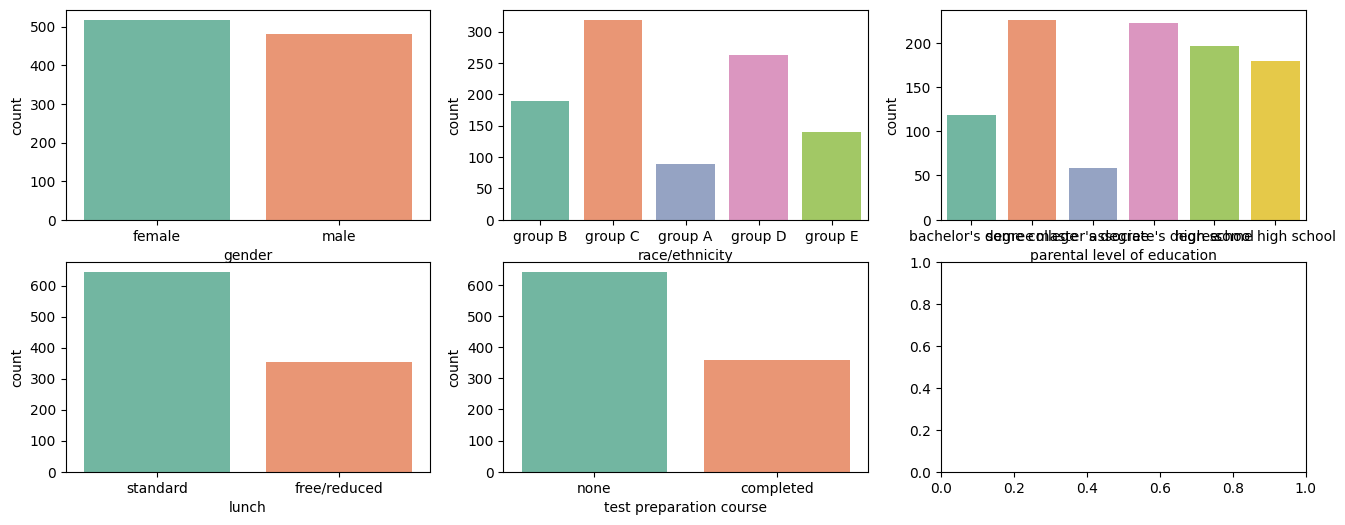

In [12]:
#Count of different category
fig, axes = plt.subplots(2, 3, figsize=(16, 6))
sns.countplot(df, x= 'gender', palette='Set2', ax=axes[0, 0])
sns.countplot(df, x= 'race/ethnicity', palette='Set2', ax=axes[0, 1])
sns.countplot(df, x= 'parental level of education', palette='Set2', ax=axes[0, 2])
sns.countplot(df, x= 'lunch', palette='Set2', ax=axes[1, 0])
sns.countplot(df, x= 'test preparation course', palette='Set2', ax=axes[1, 1])

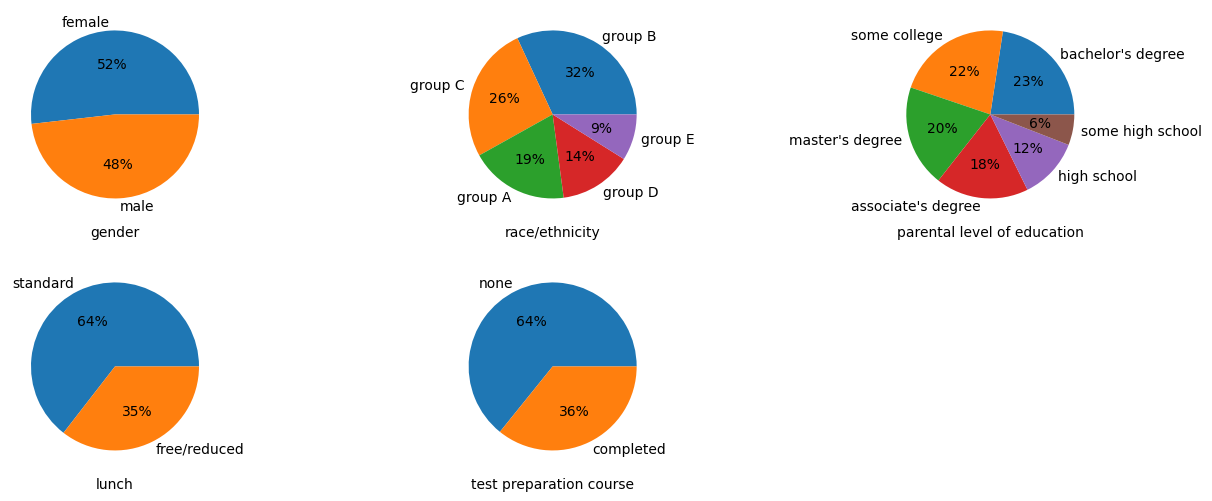

In [13]:
#percentage of diff category
cat_count=len(categorical_feature)
cat_row=int(np.ceil(cat_count/3)) #taking the celing value
fig, axes = plt.subplots(cat_row, 3,  figsize=(16, 6))

axes = axes.flatten()

for i in range(cat_count+1):
  if i < cat_count:
   plt.sca(axes[i])
   plt.pie(df[categorical_feature[i]].value_counts(), labels=df[categorical_feature[i]].unique(), autopct='%.0f%%')
   axes[i].set_xlabel(categorical_feature[i])

  else:
    axes[i].axis('off')


**Univariant analysis on numerical feature**

In [14]:
print(numerical_features)

['math score', 'reading score', 'writing score', 'average']


In [15]:
num_count = len(numerical_features)
num_rows = int(np.ceil(num_count / 3))
for k in range(2,num_rows+1):
  print(k)

2


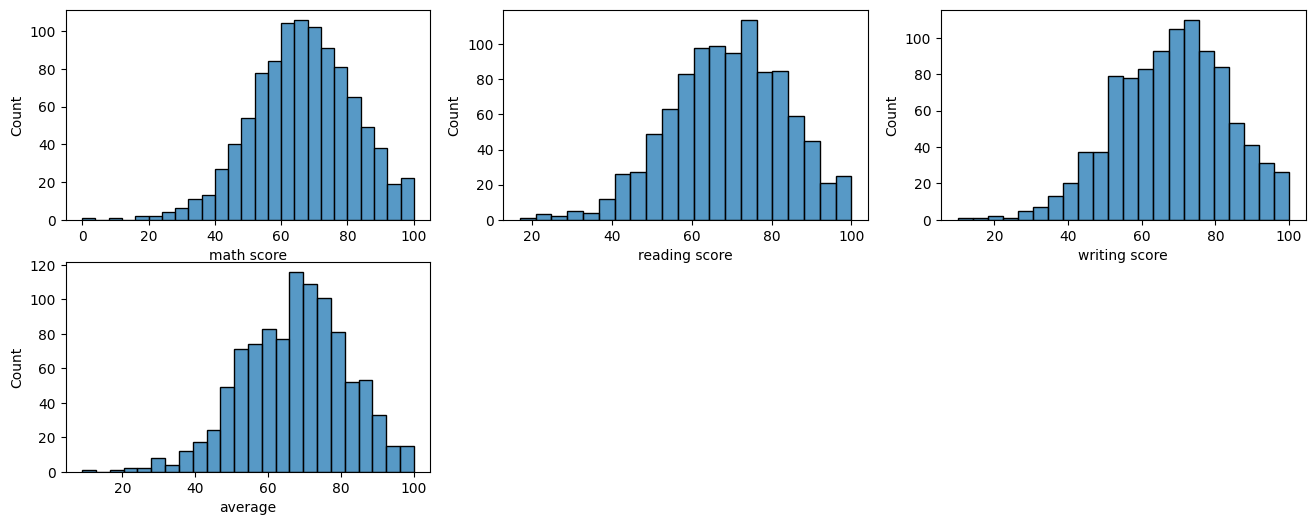

In [16]:
#distribution of diff numerical features
num_count = len(numerical_features)
num_rows = int(np.ceil(num_count / 3)) #taking the celing value
fig, axes = plt.subplots(num_rows, 3, figsize=(16, 6))

axes = axes.flatten()

for i in range(num_count):
    sns.histplot(df[numerical_features[i]], ax=axes[i])

for k in range(num_count, num_rows * 3):
    axes[k].axis('off')


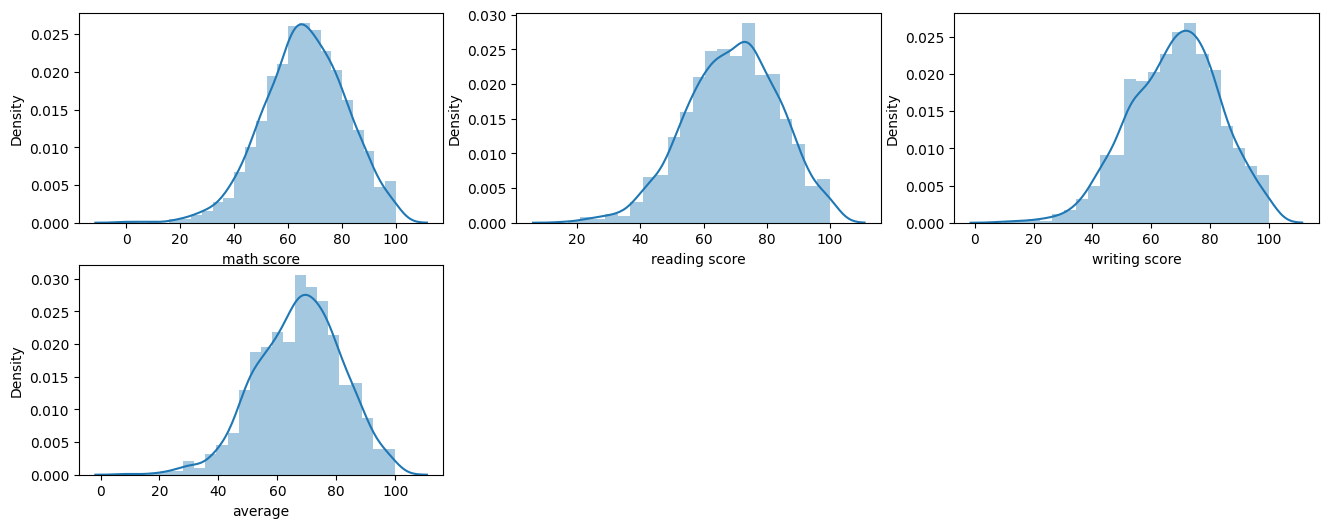

In [17]:
#PDF of diff numerical features
num_count = len(numerical_features)
num_rows = int(np.ceil(num_count / 3)) #taking the celing value
fig, axes = plt.subplots(num_rows, 3, figsize=(16, 6))

axes = axes.flatten()

for i in range(num_count+1):
    if i < num_count:
        sns.distplot(df[numerical_features[i]], ax=axes[i])

for k in range(num_count, num_rows * 3):
    axes[k].axis('off')

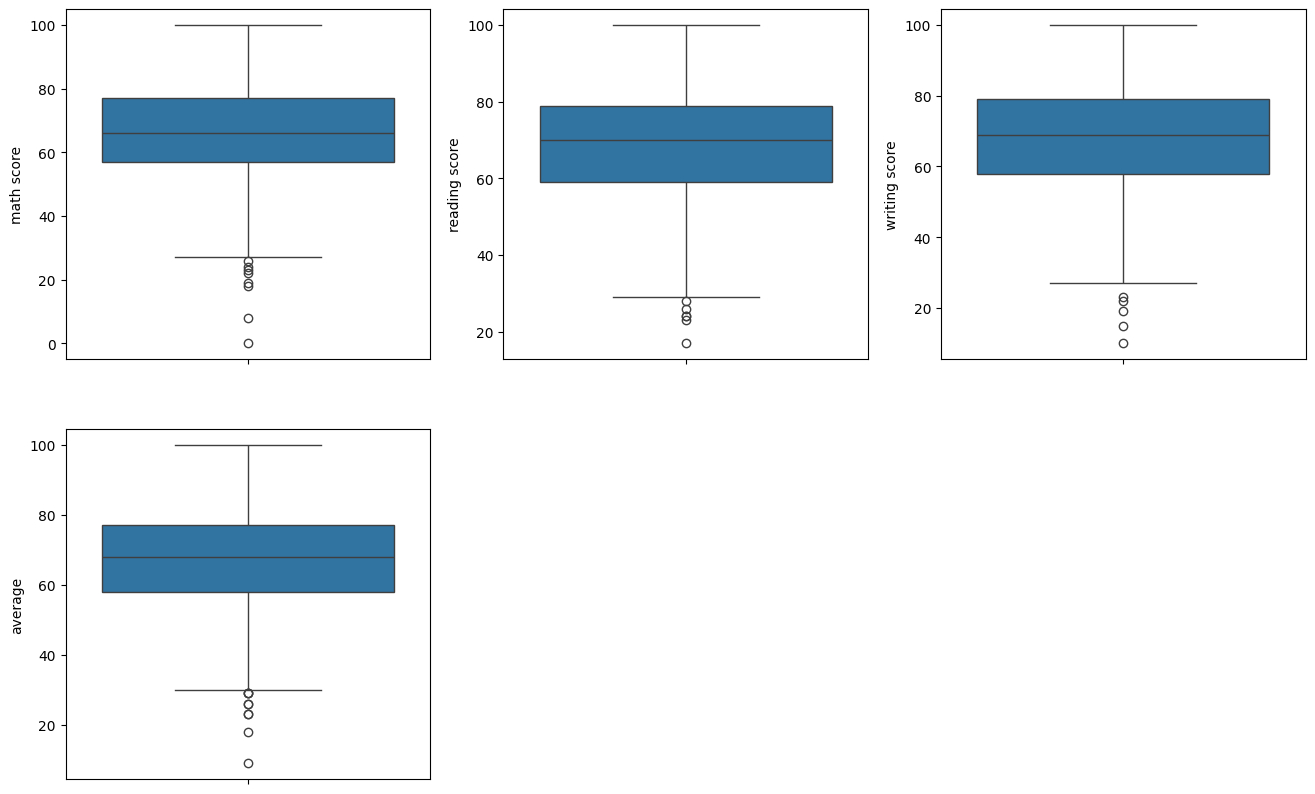

In [18]:
#Box plot of diff numerical features
num_count = len(numerical_features)
num_rows = int(np.ceil(num_count / 3)) #taking the celing value
fig, axes = plt.subplots(num_rows, 3, figsize=(16, 10))

axes = axes.flatten()

for i in range(num_count+1):
    if i < num_count:
        sns.boxplot(df[numerical_features[i]], ax=axes[i])

for k in range(num_count, num_rows * 3):
    axes[k].axis('off')

In [19]:
#Checking the skewednes of numerical features
num_count = len(numerical_features)

for i in range(num_count):
  print(numerical_features[i],df[numerical_features[i]].skew())

math score -0.27893514909431694
reading score -0.25910451810923063
writing score -0.28944397150761897
average -0.29932578552222716


**Multivariant analysis on numerical feature**

In [20]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72
1,female,group C,some college,standard,completed,69,90,88,82
2,female,group B,master's degree,standard,none,90,95,93,92
3,male,group A,associate's degree,free/reduced,none,47,57,44,49
4,male,group C,some college,standard,none,76,78,75,76


<Axes: xlabel='gender', ylabel='math score'>

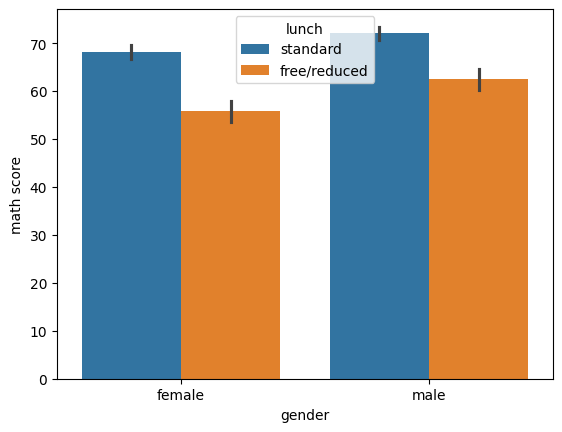

In [21]:
sns.barplot(x=df['gender'],y=df['math score'],hue=df['lunch'])


###  **KPI**


**1.What are the major factors influencing the test scores ?**

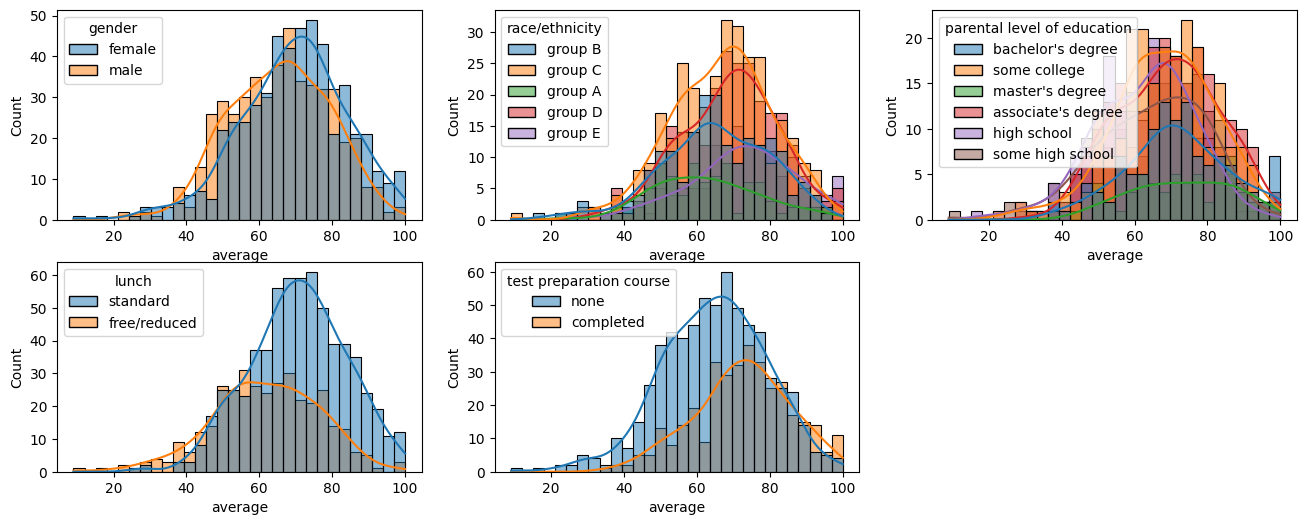

In [22]:
cat_count=len(categorical_feature)
cat_row=int(np.ceil(cat_count/3)) #taking the celing value
fig, axes = plt.subplots(cat_row, 3,  figsize=(16, 6))

axes = axes.flatten()

for i in range(cat_count+1):
  if i < cat_count:
   plt.sca(axes[i])
   sns.histplot(data=df,x='average',bins=30,kde=True,hue=categorical_feature[i])

  else:
    axes[i].axis('off')

**Observation:** Diffrent factor affect the avg marks diffrently.

* Gender: Female student is slightly getting more marks than male student.
* Race/Ethnicity: Group C D E are more likely to get good marks than Group A B.
* Lunch: Standard lunch student get good marks over free/reduced lunch student.
* Test: Student who completed the test are geting more marks than other student.



**2. Average Exam Scores: Measure the average scores achieved by students in various subjects to assess overall academic performance.**

<Axes: xlabel='average', ylabel='Count'>

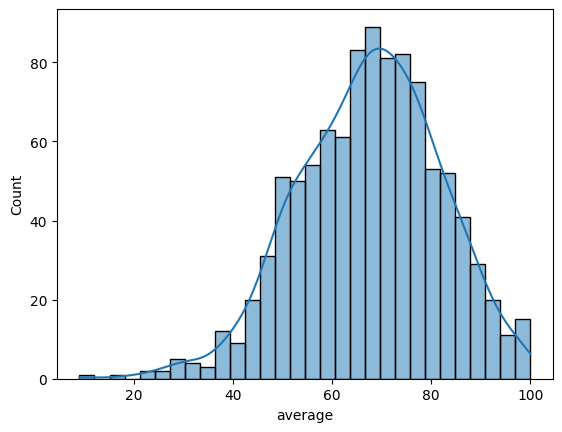

In [23]:
sns.histplot(data=df,x='average',bins=30,kde=True)

**Observation:**  Avegrage score follow normal distribution that is negatively skewed

**3. Calculate the percentage of students who pass exams based on predefined passing criteria.**

Passing marks :36

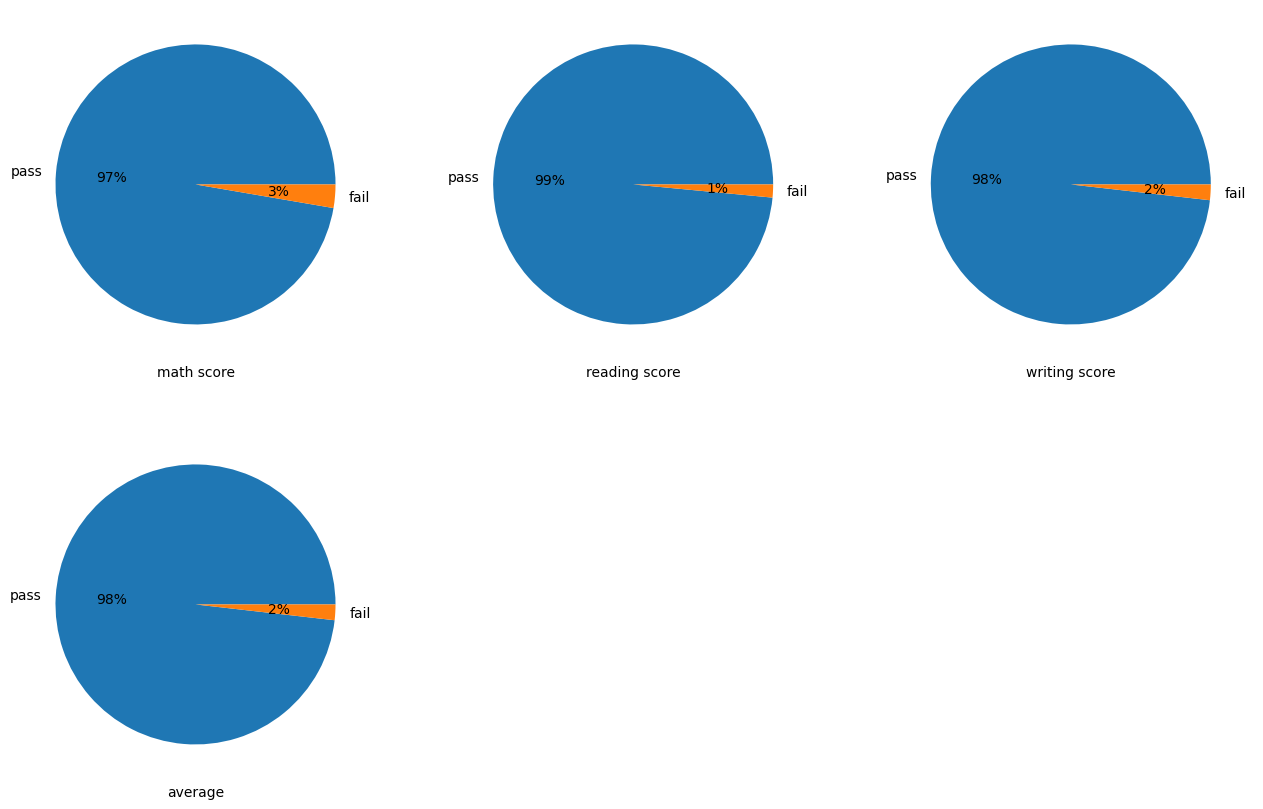

In [24]:
num_count = len(numerical_features)
num_rows = int(np.ceil(num_count / 3)) #taking the celing value
fig, axes = plt.subplots(num_rows, 3, figsize=(16, 10))

axes = axes.flatten()

for j in range(num_count):
  l=len(df[numerical_features[j]])
  pass_rate=[]
  for i in range(l):
    if df[numerical_features[j]][i]>=36:
      pass_rate.append('pass')
    else:
      pass_rate.append('fail')

  if j < cat_count:
    plt.sca(axes[j])
    pass_rate_series = pd.Series(pass_rate)
    plt.pie(pass_rate_series.value_counts(), labels=pass_rate_series.unique(), autopct='%.0f%%')
    axes[j].set_xlabel(numerical_features[j])

  for k in range(num_count, num_rows * 3):
    axes[k].axis('off')



**4. Compare the performance of male and female students to identify any gender disparities in academic achievement.**

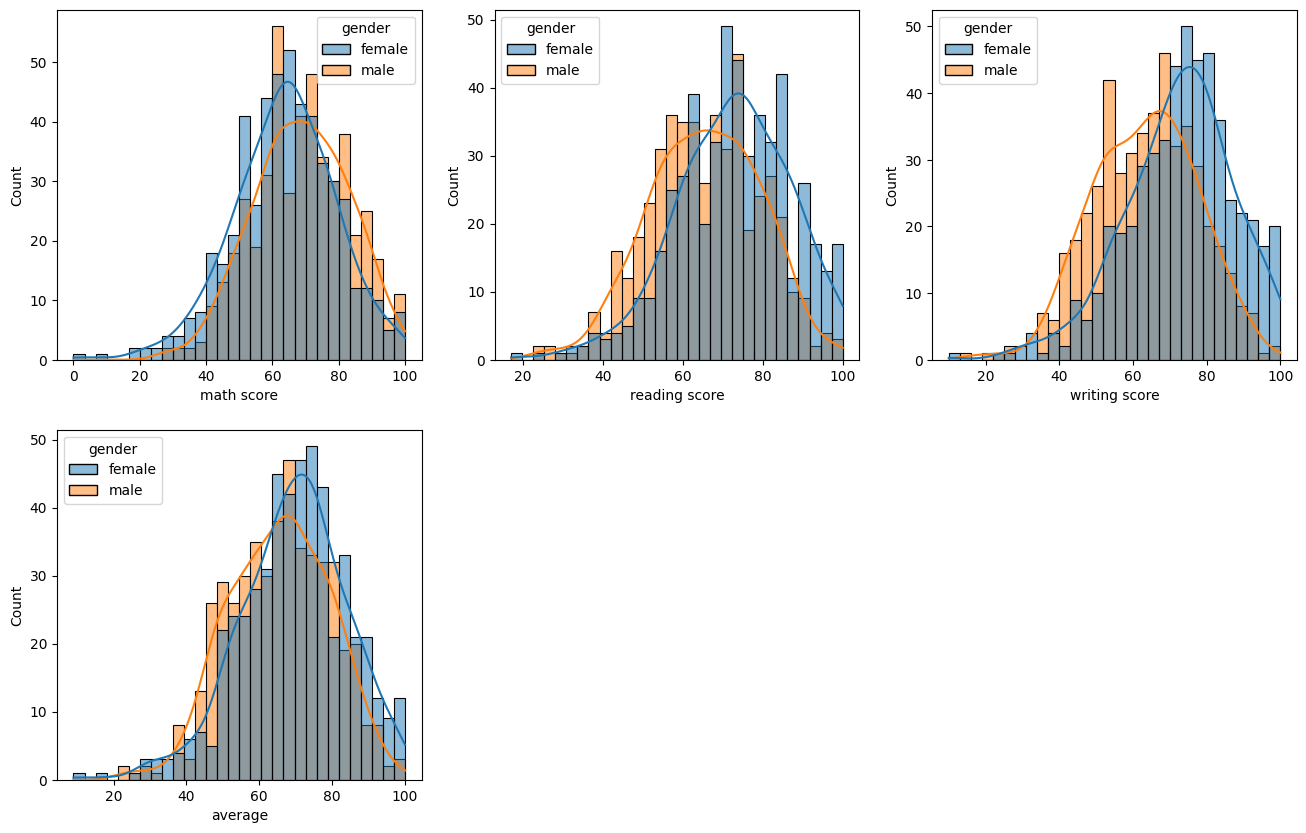

In [25]:
num_count = len(numerical_features)
num_rows = int(np.ceil(num_count / 3)) #taking the celing value
fig, axes = plt.subplots(num_rows, 3, figsize=(16, 10))

axes = axes.flatten()

for i in range(num_count):
  plt.sca(axes[i])
  sns.histplot(data=df,x=numerical_features[i],bins=30,kde=True,hue='gender')

for k in range(num_count, num_rows * 3):
  axes[k].axis('off')


**Observation:**

* Females score higher on average than males in all other subjects except maths
* Avgrage score of female is better than male

**6. Effectiveness of test preparation course?**

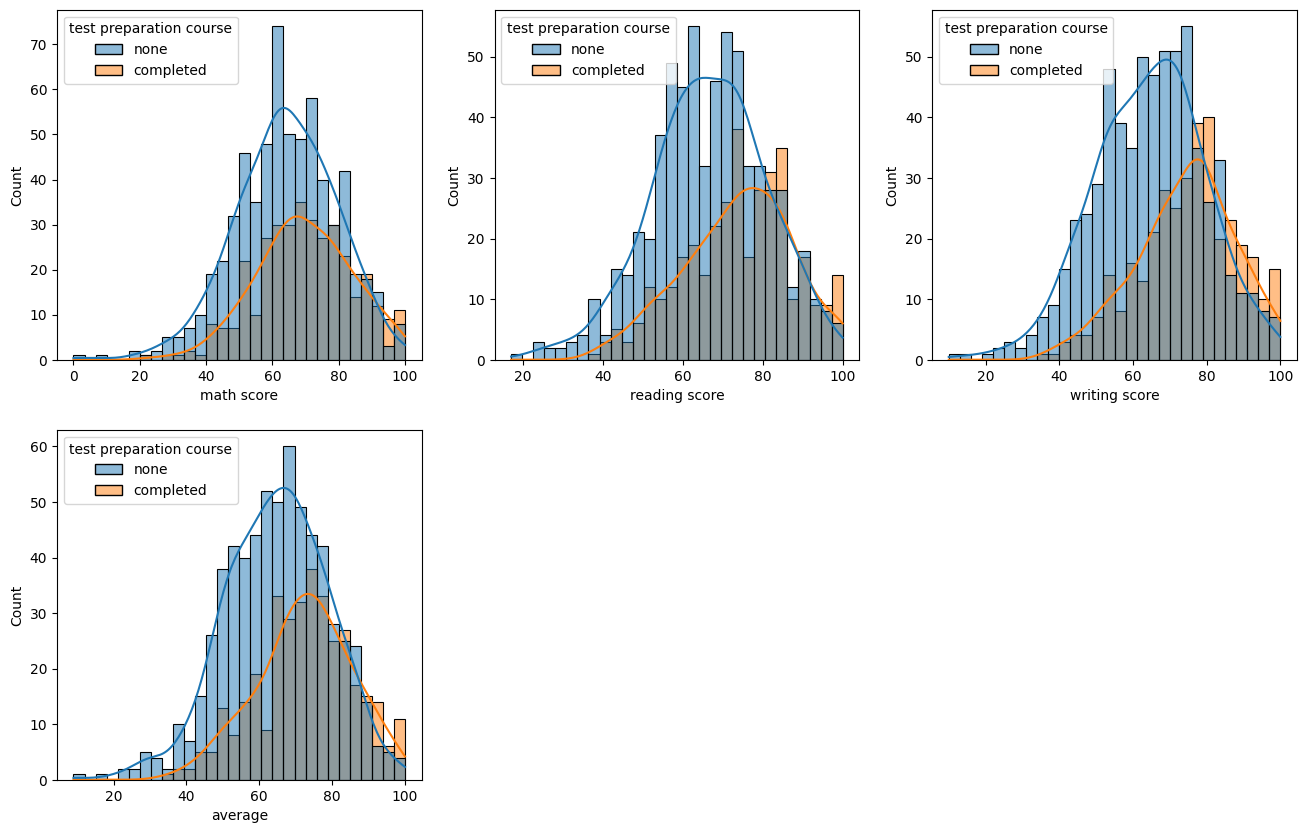

In [26]:
num_count = len(numerical_features)
num_rows = int(np.ceil(num_count / 3)) #taking the celing value
fig, axes = plt.subplots(num_rows, 3, figsize=(16, 10))

axes = axes.flatten()

for i in range(num_count):
  plt.sca(axes[i])
  sns.histplot(data=df,x=numerical_features[i],bins=30,kde=True,hue='test preparation course')

for k in range(num_count, num_rows * 3):
  axes[k].axis('off')


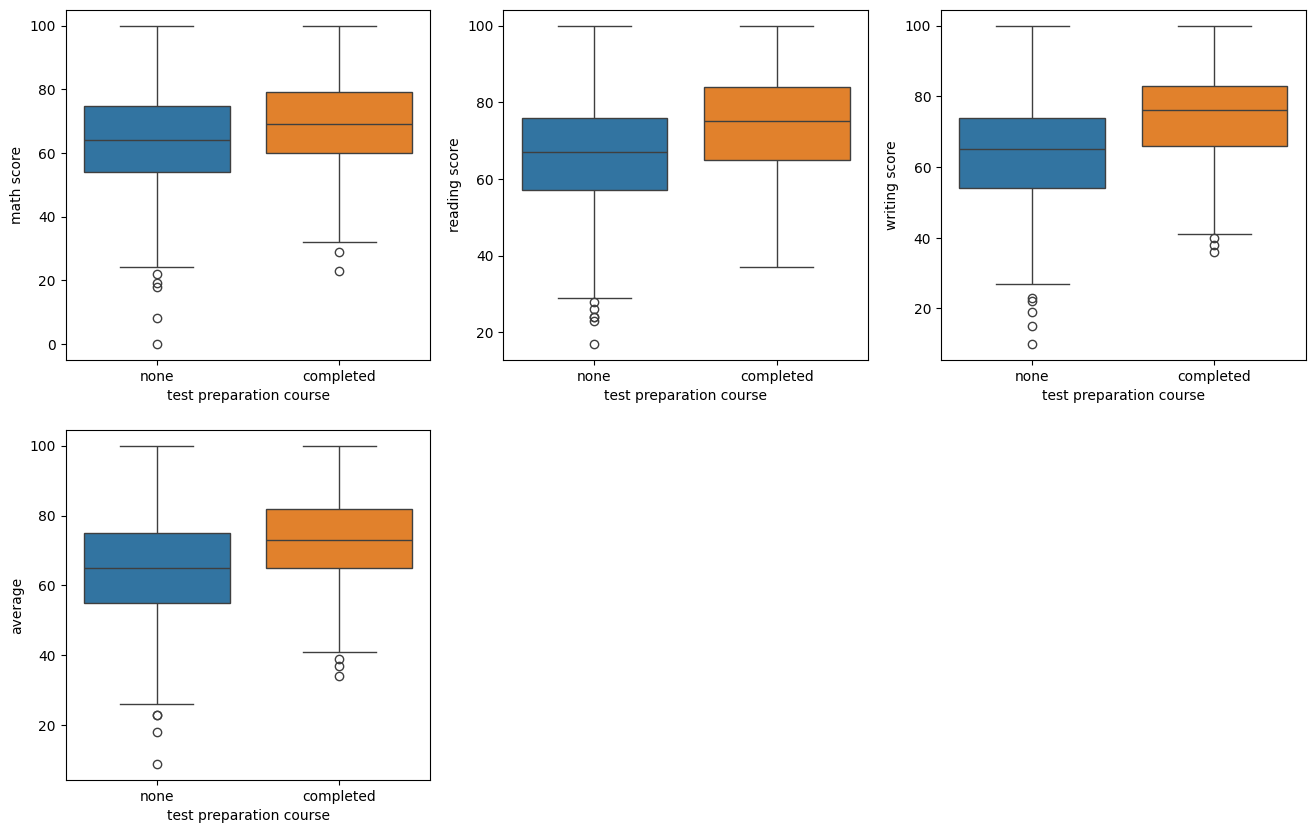

In [35]:
num_count = len(numerical_features)
num_rows = int(np.ceil(num_count / 3)) #taking the celing value
fig, axes = plt.subplots(num_rows, 3, figsize=(16, 10))

axes = axes.flatten()

for i in range(num_count):
  plt.sca(axes[i])
  sns.boxplot(x='test preparation course', y=numerical_features[i], data=df, hue='test preparation course')

for k in range(num_count, num_rows * 3):
  axes[k].axis('off')


**Observation:**

* Student completed the test perform better than those who didn't completed it.


**7. Socioeconomic Status Analysis: Assess the impact of socioeconomic factors on students' exam performance by analyzing scores based on factors such as parental education level and lunch type.**

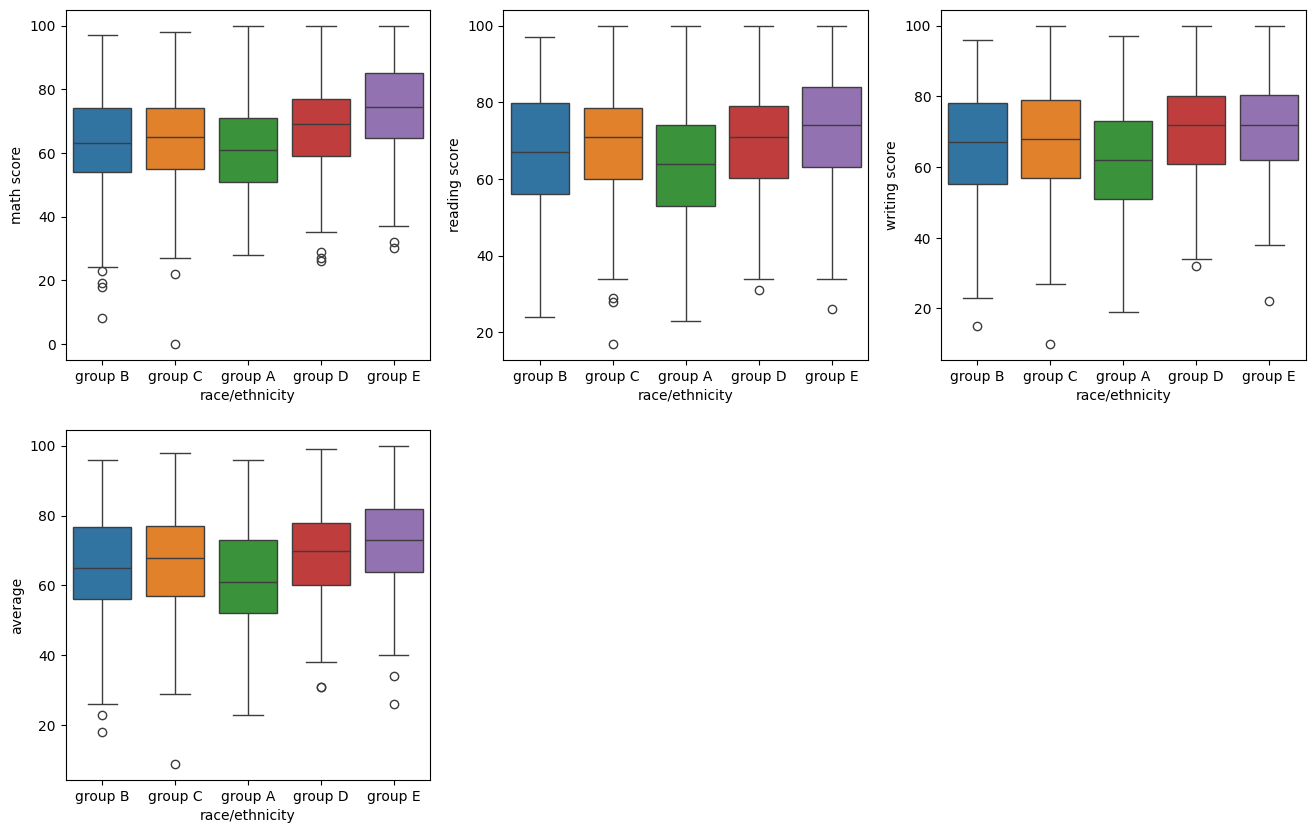

In [34]:
num_count = len(numerical_features)
num_rows = int(np.ceil(num_count / 3)) #taking the celing value
fig, axes = plt.subplots(num_rows, 3, figsize=(16, 10))

axes = axes.flatten()

for i in range(num_count):
  plt.sca(axes[i])
  sns.boxplot(x='race/ethnicity', y=numerical_features[i], data=df, hue ='race/ethnicity')

for k in range(num_count, num_rows * 3):
  axes[k].axis('off')

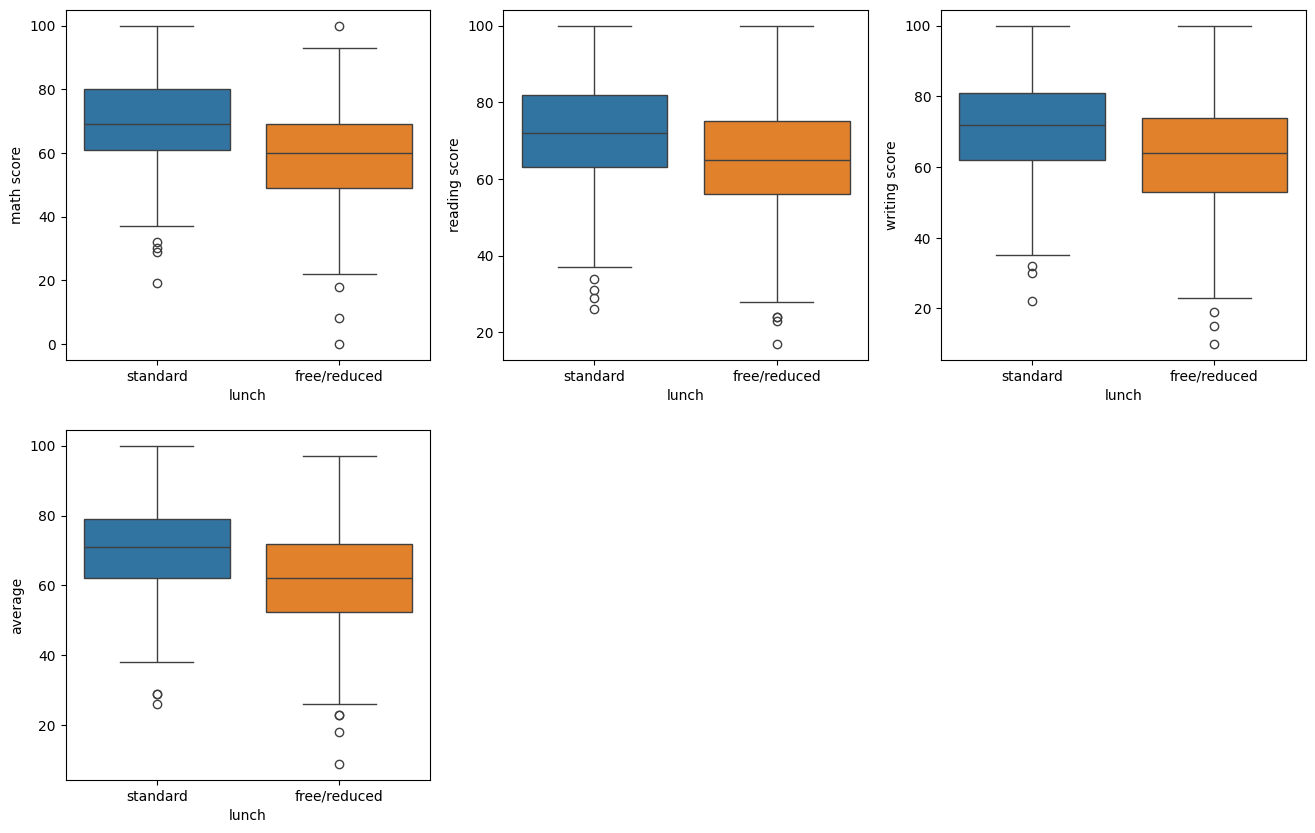

In [33]:
num_count = len(numerical_features)
num_rows = int(np.ceil(num_count / 3)) #taking the celing value
fig, axes = plt.subplots(num_rows, 3, figsize=(16, 10))

axes = axes.flatten()

for i in range(num_count):
  plt.sca(axes[i])
  sns.boxplot(x='lunch', y=numerical_features[i], data=df, hue='lunch')

for k in range(num_count, num_rows * 3):
  axes[k].axis('off')

**Observation:**

* Group E perform best in all subject while Group A perform wrost.

* Student who opted for standard lunch perform better than those took free lunch.

In [29]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72
1,female,group C,some college,standard,completed,69,90,88,82
2,female,group B,master's degree,standard,none,90,95,93,92
3,male,group A,associate's degree,free/reduced,none,47,57,44,49
4,male,group C,some college,standard,none,76,78,75,76


**Correlation**

<Axes: >

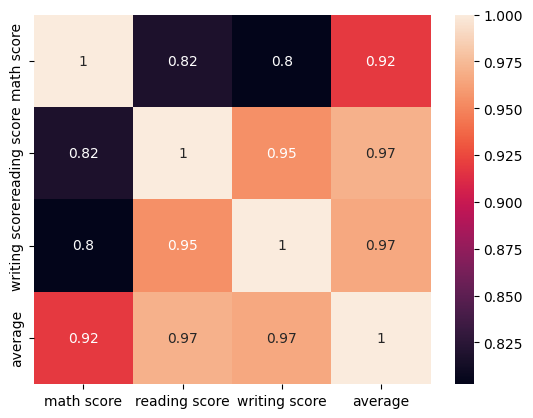

In [72]:
sns.heatmap(df.corr(),annot=True)